In [1]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
import string
import re
import nltk
import spacy
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from textblob import TextBlob
from nltk.tokenize import TweetTokenizer,word_tokenize
from nltk.stem.snowball import SnowballStemmer,PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
data = pd.read_csv('Elon_musk.csv',encoding='latin1')
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
data = [Text.strip() for Text in data.Text]
data = [Text for Text in data if Text]
data[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [7]:
text_data = ' '.join(data)
text_data

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [8]:
# Tokenization
tknzr = TweetTokenizer(strip_handles=True)
data_tokens = tknzr.tokenize(text_data)
print(data_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [9]:
token_text = ' '.join(data_tokens)
token_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [10]:
# Removing punctuations
no_punc_text = token_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [11]:
# Removing url text
no_url_text = re.sub(r'http\S+','',no_punc_text)
no_url_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
text_tokens = word_tokenize(no_url_text)
print(text_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing',

In [14]:
len(text_tokens)

17847

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:

stopwords = stopwords.words('english')
sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','U0001F495','U0001F3B6','I','U0001F476', 'U041E', 'U043D', 'U0431', 'U044B', 'U043B', 'U0432', 'U0435', 'U043B', 'U0438', 'U043A', 'U043E', 'U043B', 'U0435', 'U043F', 'U0435', 'U043D']
stopwords.extend(sw_list)
# Removing stop words
no_stop_tokens = [word for word in text_tokens if not word in stopwords]
print(no_stop_tokens)

['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'It', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway', 'together', 'one', 'mission', 'Once', 'predict', 'cash', 'flo

In [17]:
# Converting into lower case
lower_words = [Text.lower() for Text in no_stop_tokens]
print(lower_words)

['alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'sent', 'just', 'agree', 'clubhouse', 'it', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'thanks', 'fixing', 'please', 'unlock', 'account', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'your', 'app', 'sucks', 'rt', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'gateway', 'together', 'one', 'mission', 'once', 'predict', 'cash', 'flo

In [19]:
# Stemming
s_stemmer = SnowballStemmer(language='english')
stemmed_tokens = [s_stemmer.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['onc', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'starlink', 'stagger', 'difficult', 'technic', 'econom', 'endeavor', 'howev', 'spacex', 'need', 'pass', 'deep', 'chasm', 'negat', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequest', 'net', 'valu', 'product', 'made', 'must', 'scalabl', 'g', 'it', 'meant', 'price', 'countri', 'onli', 'differ', 'tax', 'ship', 'this', 'intend', 'earth', 'may', 'idea', 'appli', 'mar', 'xprize', 'team', 'manag', '100m', 'carbon', 'captur', 'prize', 'everyon', 'tesla', 'receiv', 'stock', 'my', 'comp', 'stock', 'option', 'take', 'tabl', 'that', 'miss', 'back', 'work', 'go', 'doe', 'seem', 'bit', 'high', 'doge', 'appear', 'inflationari', 'meaning', 'fix', 'coin', 'per', 'unit', 'time', 'wherea', 'wow', '1', 'orbit', 'launch', 'tower', 'stack', '2', 'enough', 'raptor', 'orbit', 'booster']


In [20]:
for word in stemmed_tokens:
    print(word+' --> '+s_stemmer.stem(word))

alien --> alien
ray --> ray
trace --> trace
cyberpunk --> cyberpunk
hdr --> hdr
nextlevel --> nextlevel
have --> have
tri --> tri
great --> great
interview --> interview
doge --> doge
underestim --> underestim
congratul --> congratul
tesla --> tesla
china --> china
amaz --> amaz
execut --> execut
last --> last
year --> year
now --> now
next --> next
even --> even
happi --> happi
new --> new
year --> year
ox --> ox
frodo --> frodo
underdog --> underdog
all --> all
thought --> thought
would --> would
fail --> fail
himself --> himself
haha --> haha
thank --> thank
inde --> ind
tweet --> tweet
definit --> definit
repres --> repr
realworld --> realworld
time --> time
alloc --> alloc
the --> the
entertain --> entertain
outcom --> outcom
like --> like
just --> just
sent --> sent
just --> just
agre --> agr
clubhous --> clubhous
it --> it
get --> get
real --> real
bought --> bought
dogecoin --> dogecoin
lil --> lil
x --> x
toddler --> toddler
hodler --> hodler
he --> he
definit --> definit
issu

haha --> haha
sn9 --> sn9
press --> press
ch4 --> ch4
header --> header
tank --> tank
helium --> helium
longterm --> longterm
solut --> solut
debat --> debat
leg --> leg
would --> would
certain --> certain
work --> work
best --> best
part --> part
part --> part
best --> best
step --> step
step --> step
save --> save
mass --> mass
cost --> cost
leg --> leg
enabl --> enabl
immedi --> immedi
reposit --> reposit
booster --> booster
launch --> launch
mount --> mount
 --> 
rea --> rea
we --> we
go --> go
tri --> tri
catch --> catch
super --> super
heavi --> heavi
booster --> booster
launch --> launch
tower --> tower
arm --> arm
use --> use
grid --> grid
fin --> fin
take --> take
load --> load
snakehead --> snakehead
dog --> dog
undivid --> undivid
attent --> attent
winderhead --> winderhead
ostrich --> ostrich
came --> came
glide --> glide
nonchal --> nonchal
seem --> seem
odd --> odd
opposit --> opposit
group --> group
bmw --> bmw
home --> home
state --> state
baveria --> baveria
that -->

haha --> haha
sexi --> sexi
crop --> crop
champion --> champion
time --> time
if --> if
next --> next
week --> week
releas --> relea
look --> look
good --> good
widen --> widen
beta --> beta
unfortun --> unfortun
mani --> mani
rule --> rule
around --> around
liquor --> liquor
distribut --> distribut
even --> even
us --> us
next --> next
week --> week
releas --> relea
special --> special
lot --> lot
fundament --> fundament
improv --> improv
import --> import
bug --> bug
fix --> fix
entir --> entir
n --> n
13 --> 13
year --> year
11 --> 11
billion --> billion
wow --> wow
safeti --> safeti
primari --> primari
design --> design
goal --> goal
fulli --> fulli
let --> let
martian --> martian
decid --> decid
futur --> futur
a --> a
lot --> lot
brain --> brain
space --> space
spent --> spent
deal --> deal
unit --> unit
terraform --> terraform
slow --> slow
relev --> relev
lifetim --> lifetim
howev --> howev
establish --> establish
human --> human
base --> base
that --> that
certain --> certain


beta --> beta
limit --> limit
releas --> relea
fsd --> fsd
price --> price
new --> new
upgrad --> upgrad
go --> go
2k --> 2k
monday --> monday
as --> as
soon --> soon
complet --> complet
test --> test
regul --> regul
approv --> approv
so --> so
mani --> mani
differ --> differ
haha --> haha
depend --> depend
prove --> prove
high --> high
safeti --> safeti
not --> not
intent --> intent
we --> we
want --> want
show --> show
could --> could
theoret --> theoret
convert --> convert
entir --> entir
us --> us
vehicl --> vehicl
f --> f
cold --> cold
gas --> gas
hot --> hot
later --> later
mean --> mean
ya --> ya
got --> got
ta --> ta
tiki --> tiki
bar --> bar
starship --> starship
nosecon --> nosecon
high --> high
bay --> bay
tiki --> tiki
bar --> bar
after --> after
get --> get
orbit --> orbit
time --> time
got --> got
littl --> littl
melti --> melti
tbh --> tbh
those --> those
engin --> engin
could --> could
go --> go
300 --> 300
bar --> bar
would --> would
dicey --> dicey
push --> push
neart

if --> if
feel --> feel
neuralink --> neuralink
might --> might
incorrect --> incorrect
overlook --> overlook
resum --> resum
declin --> declin
make --> make
offer --> offer
pleas --> plea
lmk --> lmk
co --> co
felt --> felt
done --> done
enough --> enough
internet --> internet
zip --> zip
2 --> 2
paypal --> paypal
work --> work
would --> would
it --> it
took --> took
utter --> utter
insan --> insan
amount --> amount
work --> work
move --> move
spacex --> spacex
tesla --> tesla
success --> success
probabl --> probabl
zero --> zero
to --> to
frank --> frank
earli --> ear
day --> day
thought --> thought
90 --> 90
chanc --> chanc
spacex --> spacex
tesla --> tesla
would --> would
worth --> worth
irrat --> irrat
funni --> funni
word --> word
describ --> describ
number --> number
cours --> cour
still --> still
love --> love
sure --> sure
planet --> planet
good --> good
movi --> movi
current --> current
strong --> strong
droneship --> droneship
hold --> hold
station --> station
thruster --> t

well --> well
flamethrow --> flamethrow
my --> my
favorit --> favorit
one --> one
tension --> tension
dof --> dof
compress --> compress
new --> new
roadster --> roadster
w --> w
aloha --> aloha
welcom --> welcom
back --> back
space --> space
u0001f4ab --> u0001f4ab
yeah --> yeah
post --> post
short --> short
win --> win
 --> 
worst --> worst
person --> person
ever --> ever
work --> work
 --> 
easi --> easi
some --> some
real --> real
champion --> champion
vy --> vy
titl --> titl
fair --> fair
chute --> chute
control --> control
ship --> ship
control --> control
close --> close
loop --> loop
local --> local
both --> both
oper --> oper
spacex --> spacex
autopilot --> autopilot
ms --> ms
tree --> tree
catch --> catch
fair --> fair
net --> net
u0001f610 --> u0001f610
rt --> rt
falcon --> falcon
9 --> 9
first --> first
stage --> stage
land --> land
of --> of
cours --> cour
still --> still
love --> love
you --> you
droneship --> droneship
 --> 
first --> first
time --> time
booster -->

point --> point
will --> will
discuss --> discuss
team --> team
he --> he
amaz --> amaz
great --> great
song --> song
nickel --> nickel
biggest --> biggest
challeng --> challeng
highvolum --> highvolum
longrang --> longrang
batteri --> batteri
australia --> australia
ca --> ca
that --> that
haha --> haha
this --> this
lot --> lot
potenti --> potenti
lithium --> lithium
pretti --> pretti
much --> much
everywher --> everywh
whoa --> whoa
cool --> cool
has --> has
blue --> blue
steel --> steel
we --> we
need --> need
high --> high
brinel --> brinel
hard --> hard
high --> high
corros --> corro
resist --> resist
becaus --> becaus
cybertruck --> cybertruck
facet --> facet
realli --> realli
want --> want
will --> will
great --> great
fun --> fun
could --> could
la --> la
austin --> austin
turn --> turn
shade --> shade
outdoor --> outdoor
restaur --> restaur
boca --> boca
cool --> cool
not --> not
imposs --> imposs
those --> those
day --> day
rt --> rt
rt --> rt
new --> new
video --> video
whi

In [21]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(lower_words))
print(doc)

alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree clubhouse it getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account this true power any crypto wallet give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g it meant price countries only difference taxes shipping this intended earth 

In [22]:
type(stemmed_tokens)

list

In [23]:
lemmas =[token.lemma_ for token in doc]
print(lemmas)

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'think', 'would', 'fail', 'himself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'send', 'just', 'agree', 'clubhouse', 'it', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission', 'once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'star

In [24]:
clean_tweets = ' '.join(lemmas)
clean_tweets

'alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all think would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power any crypto wallet give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g it mean price country only difference taxis ship this intend earth may idea apply mars xprize team manage 100 m 

### Bag of Words

In [25]:
vectorizer = CountVectorizer()
tweets_cv = vectorizer.fit_transform(lemmas)
print(vectorizer.vocabulary_)  

{'alien': 195, 'ray': 2359, 'trace': 3023, 'cyberpunk': 769, 'hdr': 1364, 'nextlevel': 1969, 'have': 1359, 'try': 3055, 'great': 1312, 'interview': 1561, 'doge': 894, 'underestimate': 3174, 'congratulation': 677, 'tesla': 2931, 'china': 587, 'amazing': 219, 'execution': 1063, 'last': 1645, 'year': 3391, 'now': 1997, 'next': 1968, 'even': 1037, 'happy': 1346, 'new': 1966, 'ox': 2098, 'frodo': 1213, 'underdoge': 3173, 'all': 198, 'think': 2959, 'would': 3377, 'fail': 1098, 'himself': 1406, 'haha': 1335, 'thank': 2941, 'indeed': 1502, 'tweet': 3070, 'definitely': 807, 'represent': 2426, 'realworld': 2374, 'time': 2982, 'allocation': 200, 'the': 2945, 'entertaining': 1007, 'outcome': 2076, 'likely': 1699, 'just': 1603, 'send': 2569, 'agree': 179, 'clubhouse': 616, 'it': 1580, 'get': 1272, 'real': 2369, 'buy': 505, 'dogecoin': 896, 'lil': 1700, 'toddler': 2993, 'hodler': 1412, 'he': 1365, 'issue': 1579, 'sentencing': 2574, 'seem': 2561, 'bit': 420, 'high': 1398, 'fix': 1158, 'please': 2193,

In [26]:
print(tweets_cv.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
print(tweets_cv.toarray().shape)

(11443, 3411)


### n-grams

In [28]:
ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram = ngram_range.fit_transform(lemmas)

In [29]:
print(ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'ai', 'also', 'back', 'big', 'booster', 'car', 'come', 'complete', 'cool', 'could', 'crew', 'day', 'design', 'do', 'dragon', 'earth', 'engine', 'even', 'ever', 'exactly', 'falcon', 'first', 'flight', 'fsd', 'future', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'if', 'it', 'just', 'land', 'launch', 'life', 'like', 'look', 'lot', 'make', 'many', 'mar', 'maybe', 'mission', 'model', 'much', 'need', 'new', 'next', 'no', 'not', 'one', 'part', 'people', 'point', 'pretty', 'probably', 'production', 'right', 'rocket', 'rt', 'say', 'seem', 'soon', 'space', 'spacex', 'starlink', 'starship', 'start', 'still', 'super', 'sure', 'take', 'tesla', 'test', 'thank', 'that', 'the', 'there', 'they', 'think', 'this', 'time', 'true', 'try', 'ufe0f', 'use', 'way', 'we', 'week', 'well', 'will', 'work', 'would', 'yeah', 'year', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### TF-IDF Vectorizer

In [31]:
tfidfv_ngram_max_features = TfidfVectorizer(analyzer= 'word',ngram_range= (1,3),max_features=100)
tfidf_matrix_ngrams = tfidfv_ngram_max_features.fit_transform(lemmas)

In [32]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngrams.toarray())

['actually', 'ai', 'also', 'back', 'big', 'booster', 'car', 'come', 'complete', 'cool', 'could', 'crew', 'day', 'design', 'do', 'dragon', 'earth', 'engine', 'even', 'ever', 'exactly', 'falcon', 'first', 'flight', 'fsd', 'future', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'if', 'it', 'just', 'land', 'launch', 'life', 'like', 'look', 'lot', 'make', 'many', 'mar', 'maybe', 'mission', 'model', 'much', 'need', 'new', 'next', 'no', 'not', 'one', 'part', 'people', 'point', 'pretty', 'probably', 'production', 'right', 'rocket', 'rt', 'say', 'seem', 'soon', 'space', 'spacex', 'starlink', 'starship', 'start', 'still', 'super', 'sure', 'take', 'tesla', 'test', 'thank', 'that', 'the', 'there', 'they', 'think', 'this', 'time', 'true', 'try', 'ufe0f', 'use', 'way', 'we', 'week', 'well', 'will', 'work', 'would', 'yeah', 'year', 'you']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


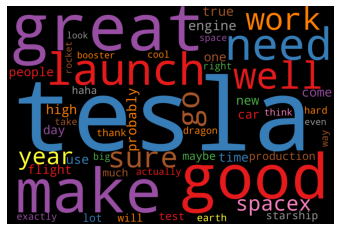

In [33]:
def plot_cloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis('off')

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width =3000,height=2000,background_color = 'black',max_words=50,colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

In [34]:
Review_words = clean_tweets.split(' ')

In [35]:
#Positive words 
with open('positive-words.txt','r')as pos:
  poswords = pos.read().split('\n')
poswords = poswords[36:]

#Negative words

with open('negative-words.txt','r') as neg:
  negwords = neg.read().split('\n')
negwords = negwords[37:]

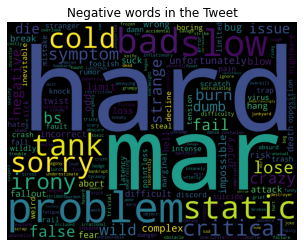

In [40]:
tweet_neg_in_neg = " ".join ([w for w in Review_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=2000,
                      height=1500
                     ).generate(tweet_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)
plt.axis("off")
plt.title('Negative words in the Tweet')
plt.show()

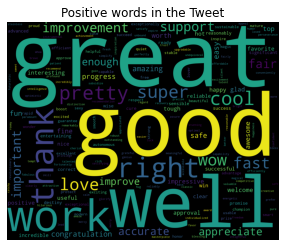

In [41]:
tweet_pos_in_pos = " ".join ([w for w in Review_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=2000,
                      height=1600
                     ).generate(tweet_pos_in_pos)
plt.imshow(wordcloud_pos_in_pos)
plt.axis("off")
plt.title('Positive words in the Tweet')
plt.show()

In [43]:
print('Positive tweets :',len(tweet_pos_in_pos))

Positive tweets : 6255


In [45]:
print('Negative tweets :',len(tweet_neg_in_neg))

Negative tweets : 3123


In [46]:
print('Total tweets :',len(Review_words))

Total tweets : 11443


In [49]:
print('Ratio of Positive tweets :',np.round(6255/11443,2))

Ratio of Positive tweets : 0.55


In [50]:
print('Ratio of Negative tweets :',np.round(3123/11443,2))

Ratio of Negative tweets : 0.27


There are more positive words in the tweets than that of negative words.

### Named Entity Recognition

In [51]:
nlp = spacy.load('en_core_web_sm')

one_block = clean_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style = 'ent',jupyter = True)

In [52]:
for token in doc_block[100:200]:
    print(token,token.pos_)

once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink VERB
ipo NOUN
starlink NOUN
staggeringly ADV
difficult ADJ
technical ADJ
economic ADJ
endeavor NOUN
however ADV
spacex ADJ
need AUX
pass VERB
deep ADJ
chasm NOUN
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
must AUX
scalable VERB
g NOUN
it PRON
mean VERB
price NOUN
country NOUN
only ADV
difference NOUN
taxis ADJ
ship NOUN
this PRON
intend VERB
earth NOUN
may AUX
idea NOUN
apply VERB
mars PROPN
xprize PROPN
team NOUN
manage VERB
100 NUM
m PROPN
carbon NOUN
capture NOUN
prize PROPN
everyone PRON
tesla NOUN
receive VERB
stock NOUN
my PRON
comp NOUN
stock NOUN
option NOUN
take VERB
table NOUN
that PRON
miss VERB
back ADP
work NOUN
go VERB
do AUX
seem VERB
bit ADV
high ADJ
doge X
appear VERB
inflationary ADJ
meaningfully ADV
fix VERB
coin NOUN
per ADP
unit NOUN
time NOUN
whereas SCONJ
wow NUM
1 NUM
orbital A

In [53]:
# Filtering the nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['booster', 'improve', 'ship', 'booster', 'mass', 'work', 'tonight', 'ðogecoin', 'video', 'people', 'speak', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'let', 'come', 'crypto', 'simplicity', 'genius', 'decade', 'work', 'look', 'note', 'email', 'text', 'lesson', 'learn', 'earth', 'time', 'tell', 'story', 'tesla', 'read', 'kingdom', 'hear', 'name', 'year', 'dogecake', 'thing', 'restaurant', 'hang', 'currency', 'earth', 'scratch', 'destiny', 'franz', 'say', 'ship', 'landing', 'burn', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'seem', 'raptor', 'launch', 'mission', 'collect', 'galaxy', 'explore', 'launch', 'starlink', 'satellite', 'orbit', 'mission', 'pad', '39a', 'deck', 'default', 'engine', 'lever', 'arm', 'shut', 'engine', 'point', 'flameout', 'risk', 'start', 'engine', 'shut', 'need', 'land', 'become', 'destroyer', 'happen', 'sandstorm', 'masterpiece', 'dumb', 'time', 'try', 'pull', 'method']


In [54]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1],reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,launch,64
1,make,64
2,year,49
3,work,48
4,go,47
5,need,42
6,come,39
7,get,38
8,day,38
9,time,37


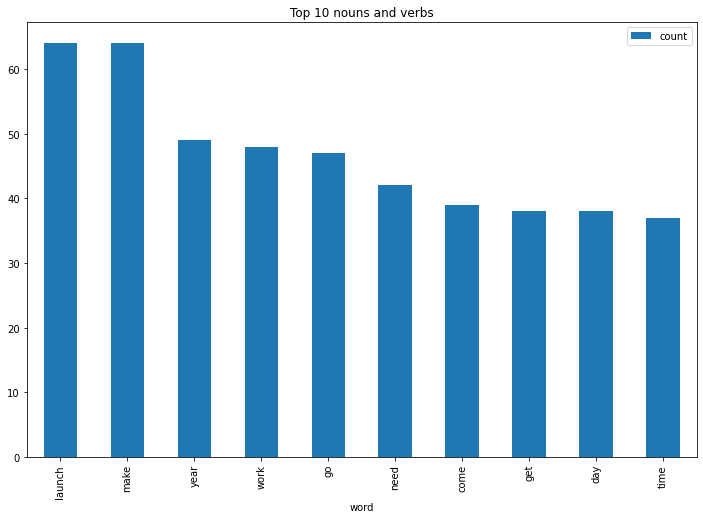

In [55]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title = 'Top 10 nouns and verbs');

In [58]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(clean_tweets)

{'neg': 0.073, 'neu': 0.655, 'pos': 0.272, 'compound': 1.0}

In [59]:
def get_vader_sentiment(review): 
   
    sia = SentimentIntensityAnalyzer()
    analysis = sia.polarity_scores(review)
    if analysis["compound"] > 0: 
        return 'positive'
    elif analysis["compound"] < 0: 
        return 'negative'
    else: 
        return 'neutral'

In [60]:
get_vader_sentiment(clean_tweets)

'positive'

Tweets are postive.